# Ryan's Mushroom Classification
**Author:** Ryan Krabbe  
**Date:** 3/31/2025


## Introduction
In this project, I used classification models to accuractely predict whether mushrooms are edible or poisonous based on several physical characteristics. Throughout the project, I applied various techniques to clean, analyze and encode the data to better prepare it for modeling. The goal was to build effective machine learning models that would be able to clasify mushrooms as either edible or poisonous with a high degree of accuracy.

## Imports
Below are the necessary Python libraries for this notebook.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows

In [10]:
# Load the data
df = pd.read_csv(r'C:\Projects\midterm-04-krabbe\mushroom_dataset\agaricus-lepiota.data', header=0)

# Display basic info
df.info()

# Display first 10 rows
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises?                  8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


### 1.2 Check for missing values and display summary statistics

In [13]:
# Check for missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [16]:
# Display summary statistics
print(df.describe(include='all').T)

                         count unique top  freq
class                     8124      2   e  4208
cap-shape                 8124      6   x  3656
cap-surface               8124      4   y  3244
cap-color                 8124     10   n  2284
bruises?                  8124      2   f  4748
odor                      8124      9   n  3528
gill-attachment           8124      2   f  7914
gill-spacing              8124      2   c  6812
gill-size                 8124      2   b  5612
gill-color                8124     12   b  1728
stalk-shape               8124      2   t  4608
stalk-root                8124      5   b  3776
stalk-surface-above-ring  8124      4   s  5176
stalk-surface-below-ring  8124      4   s  4936
stalk-color-above-ring    8124      9   w  4464
stalk-color-below-ring    8124      9   w  4384
veil-type                 8124      1   p  8124
veil-color                8124      4   w  7924
ring-number               8124      3   o  7488
ring-type                 8124      5   

## Reflection 1: What do you notice about the dataset? Are there any data issues?
- The dataset consists of 8124 samples and 23 features
- The target variable is **class**
- There are no missing values in the dataset
- All of the features are non-numeric
- Some of the categorical features need encoding

## Section 2. Data Exploration and Preparation
### 2.1 Explore Data Patterns and Distributions

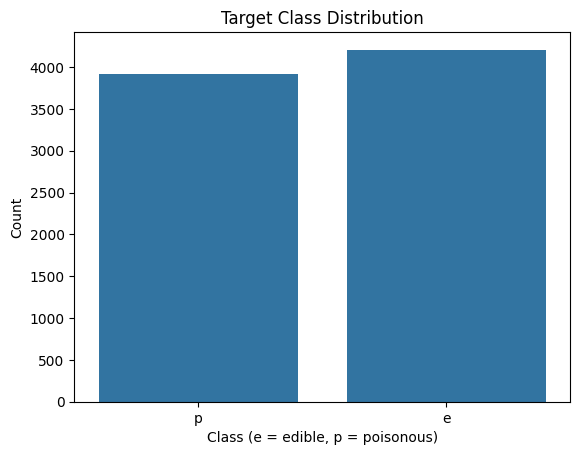

In [18]:
# Check class imbalance
sns.countplot(x='class', data=df)
plt.title('Target Class Distribution')
plt.xlabel('Class (e = edible, p = poisonous)')
plt.ylabel('Count')
plt.show()

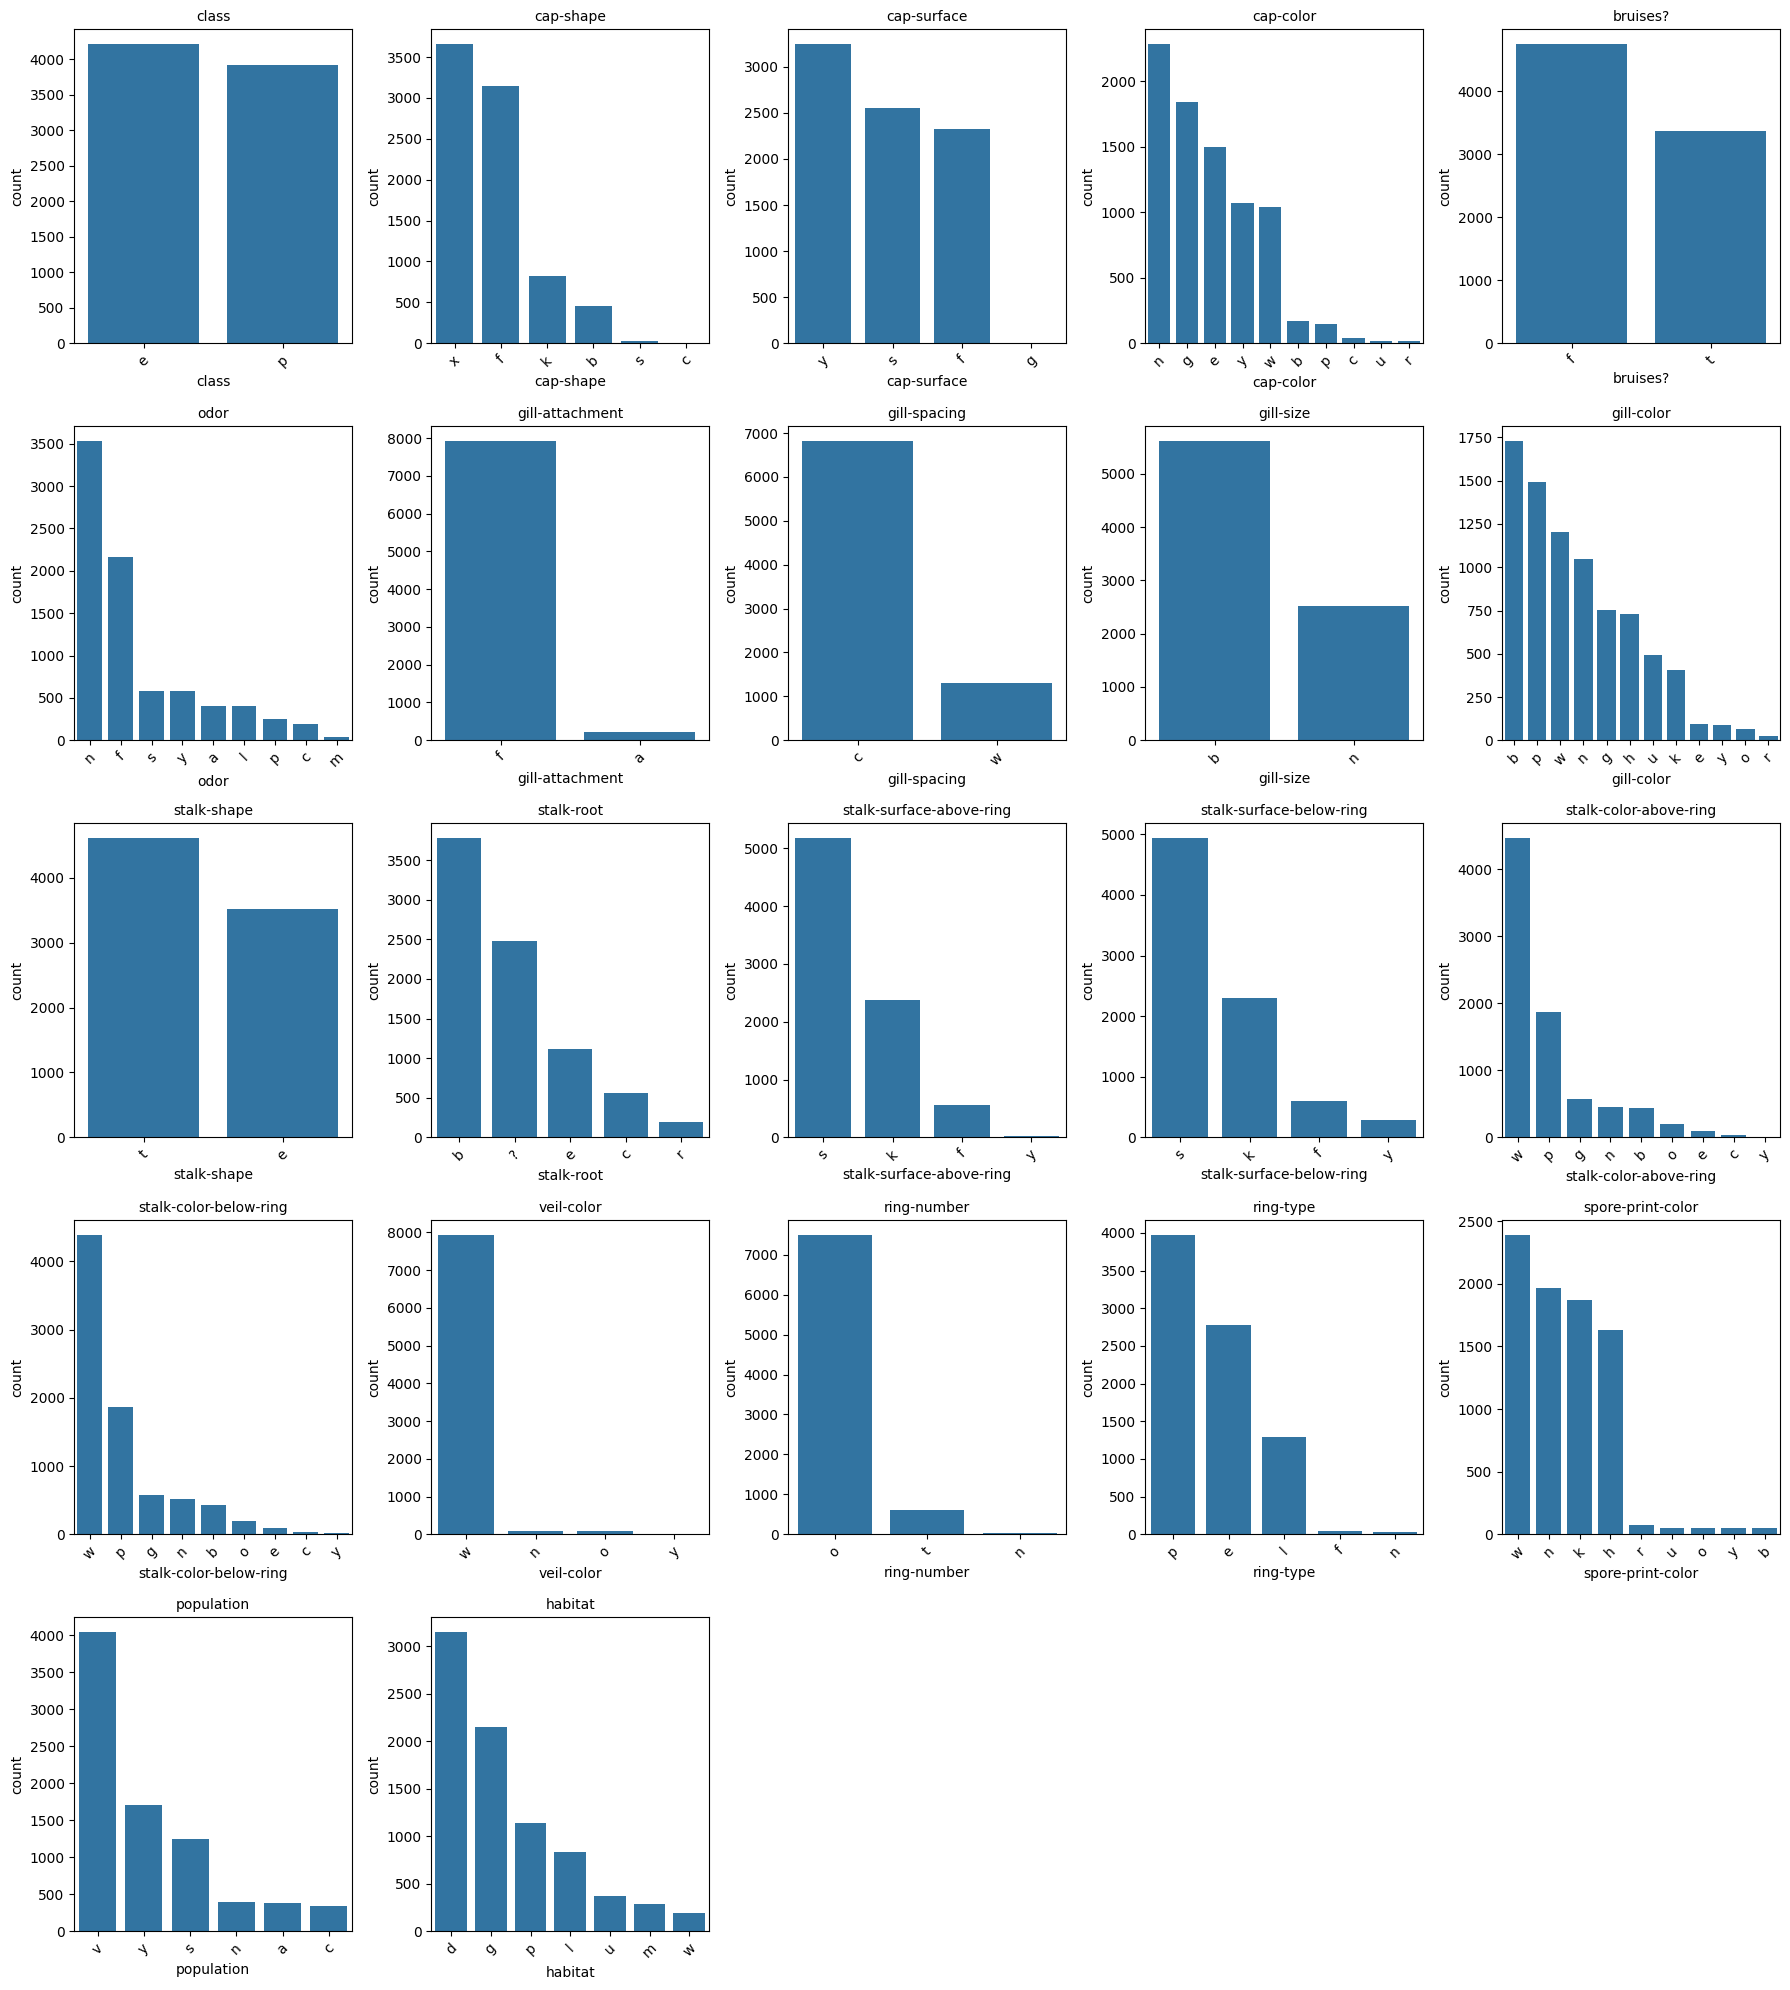

In [22]:
import math

# Set number of plots per row
plots_per_row = 5
num_plots = len(categorical_cols)
num_rows = math.ceil(num_plots / plots_per_row)

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(18, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 2.2 Handle missing values and clean data

In [34]:
# replace '?' with np.nan
df.replace('?', np.nan, inplace=True)

# drop veil-type
df.drop(columns=['veil-type'], inplace=True, errors='ignore')

# Fill missing stalk-root values with the mode to fill missing values so I can encode
most_common_root = df['stalk-root'].mode()[0]
df['stalk-root'] = df['stalk-root'].fillna(most_common_root)

# check for missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [36]:
# convert categorical data to numeric (encoding)
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid changing the original
df_encoded = df.copy()

# Encode each column
le = LabelEncoder()
for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# display cleaned data
print(df_encoded.head())

   class  cap-shape  cap-surface  cap-color  bruises?  odor  gill-attachment  \
0      1          5            2          4         1     6                1   
1      0          5            2          9         1     0                1   
2      0          0            2          8         1     3                1   
3      1          5            3          8         1     6                1   
4      0          5            2          3         0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-above-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0

## Reflection 2: Data Cleaning & Preparation
- The data was mostly clean other than the stalk-root column, which contained 2,480 missing values (30%) of the data. I filled the missing stalk-root values with the mode, which was the most frequent category so I could encode properly.
- I removed the veil-type column from the dataset since this column only had one unique value, which makes it useless for modeling.
- I used label encoding to convert all the categorical columns into numeric values. Ex: For the class column, I assigned value 'e' (edible) as 0 and 'p' (poisonous) as 1. By doing this it should help with the modeling.

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target
The goal of my classisification is to predict whether a mushroom is ***edible*** or ***poisonous*** based on the features highlighted below.

Input Features (X)
- odor
- gill-size
- bruises
- spore-print-color

Target variable (y)
- Class
    - Edible = 0
    - Poisonous = 1


I chose the above input features because they are the most correlated with mushroom edibility.


### 3.2 Define x and y

In [37]:
# Target column is 'class' (0 = edible, 1 = poisonous)
X = df_encoded[['odor', 'gill-size', 'bruises?', 'spore-print-color']]
y = df_encoded['class']

## Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?
- The features I chose are all heavily correlated with the edibility of a mushroom and help distinguish between mushrooms that are edible and poisonous.
- Certain features such as odor and gill-size are consistent and offer strong indicators of toxicity.

## Section 4. Train a Model (Classification: Choose 1: Decision Tree, Random Forest, Logistic Regression)
### 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).

In [38]:
from sklearn.model_selection import train_test_split

# Split the data 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 4.2 Train model using Scikit-Learn model.fit() method.

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
df_model = DecisionTreeClassifier(random_state=42)

# Train the model
df_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Decision Tree Performance
Accuracy:  0.9945
Precision: 1.0
Recall:    0.9885
F1 Score:  0.9942


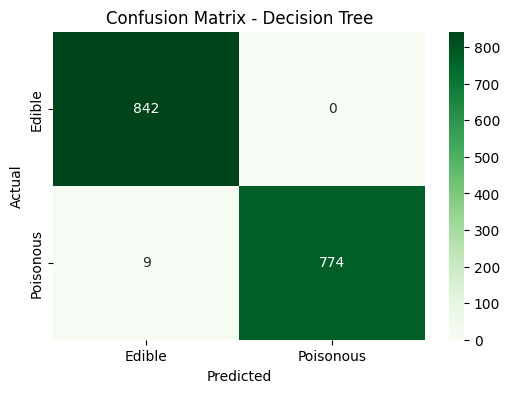

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Make predictions
y_pred = df_model.predict(X_test)

# Print Performance
print("Decision Tree Performance")
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:   ", round(recall_score(y_test, y_pred), 4))
print("F1 Score: ", round(f1_score(y_test, y_pred), 4))

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

## Reflection 4: How well did the model perform? Any surprises in the results?
- Accuracy 99.45% - The accuracy was very high and nearly perfect
- Precision 1.0 - There were no false positives. The precision was perfect.
- Recall 98.85% - Again, this was nearly perfect. Only a few of the mushrooms were misclassified as edible.
- F1 Score 99.42% - The F1 Score of 99.42% confirms that the model was extremely accurate and precise.

Overall, the Decision Tree model performed extremely well - nearly perfect. There were only a few cases where a few mushrooms were misclassified as edible, but for the amount of data that was consumed I am very happy with how the Decision Tree model performed.

## Section 5. Improve the Model or Try Alternates (Implement a Second Option)
### 5.1 Train an alternative classifier (e.g., Decision Tree, Random Forest, Logistic Regression) OR adjust hyperparameters on the original model.

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 5.2 Compare performance of all models across the same performance metrics.

Random Forest Performance:
Accuracy: 0.9944615384615385
Precision: 1.0
Recall: 0.9885057471264368
F1 Score: 0.9942196531791907


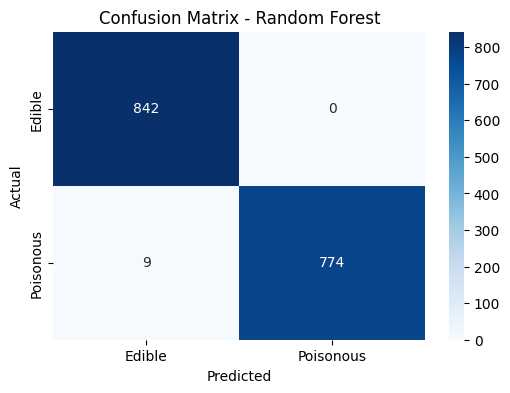

In [57]:
# Make Predictions
y_rf_model_pred = rf_model.predict(X_test)

# Print performance
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_rf_model_pred))
print("Precision:", precision_score(y_test, y_rf_model_pred))
print("Recall:", recall_score(y_test, y_rf_model_pred))
print("F1 Score:", f1_score(y_test, y_rf_model_pred))

# Plot Heatmap
cm_rf = confusion_matrix(y_test, y_rf_model_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

## Reflection 5: Which model performed better? Why might one classifier be more effective in this specific case?
Below is a table with notes comparing the Decision Tree Model and Random Forest Model

| Metric       | Decision Tree | Random Forest | Notes |
|--------------|----------------|----------------|-------|
| **Accuracy** | 99.45%         | 99.75%         | Random Forest Model performed slightly better |
| **Precision**| 100.00%        | 100.00%        | Both models were perfect with no false positives |
| **Recall**   | 98.85%         | 99.45%         | The Random Forest Model performed slightly better identifying more poisonous mushrooms |
| **F1 Score** | 99.42%         | 99.72%         | The Random Forest Model's F1 Score was slightly higher, which was a given considering it performed better in every metric |

Overall, both models performed extremely well with the slight edge given to the Random Forest model. I believe both models performed so well because the data was clean, categorical and straighforward for a model to interpret. The reason why the Random Forest model slightly outperformed the Decision Tree was due to the Random Forest model using multiple trees to make decisions, which reduces the risk of overfitting and inreases generalization. By doing this, the model will become more accurate than the Decision Tree model, which is just one model.


## Section 6. Final Thoughts & Insights
### 6.1 Summarize findings
This project aimed to classify mushrooms as either edible or poisonous by applying machine learning models to key features extracted from the dataset. I applied label encoding to the data to convert all categorical features into numeric format to help with the Decision Tree & Random Forest modeling that I chose.

Both the Decision Tree and Random Forest model performed extremely well - nearly perfect in terms of accuracy. Part of the reason why the models performed so well was because of the features selected. The features (odor', 'gill-size', 'bruises?', 'spore-print-color) showed strong correlation with the target variable 'class'  and were extremely predictive of mushroom edibility. 

I was happy with the results of both models, but the Random Forest model performed slightly better than the Decision Tree Model likly due to the Random Forest model using multiple trees to make decisions, which reduces the risk of overfitting and inreases generalization on unseen data.

### 6.2 Discuss challenges faced
The main challenged I faced occured when cleaning the data and preparing it for the modeling. The 'stalk-root' column contained 2480 missing values, which was roughly 30% of the data. I ended up filling the missing stalk-root values with the mode, which was the most frequent category.

Another challenge I faced was dealing with the fully categorical dataset. All of the features were categorical so I had to apply label encoding in order to properly run the models. 

By addressing these two challenges, the data became clean and resulted in strong performance by both models that were used.

### 6.3 If you had more time, what would you try next?
If I had more time, I would experiement with different models to see how their performance compares to the Decision Tree & Random Forest model.

Also, I would select different features to see how they compare to the original features that I chose to predict mushroom edibility.

## Reflection 6: What did you learn from this project?

This project provided me with a hands-on machine learning experience including cleaning, extracting and encoding the data. I learned how to work with a fully categorical dataset and apply proper label encoding techniques to prepare the data for modeling. 

Additionally, I gained valuable experience in comparing different classification models and presenting those results in a well-organized and thoughtful manner.